# Boxes: a benchmark for free-floating rigid bodies

This test simulates free-floating rigid bodies with and without gravity and verifies that their response matches the predicted analytical solutions.

The relevant physical principles are momentum conservation
and the rotational stability of rigid bodies, sometimes referred to as the
[tennis racket theorem](https://en.wikipedia.org/wiki/Tennis_racket_theorem)
or the Dzhanibekov effect.
Depending on the shape of an object, it may have unstable rotations
about a particular axis, which causes tumbling
([excellent video here](https://www.youtube.com/watch?v=L2o9eBl_Gzw)).

Two scenarios are chosen in this benchmark to represent simple and complex trajectories.
The "simple" scenario has no gravity and stable rotations,
and the "complex" scenario has gravity and unstable rotations.

## Simple scenario

Without gravity, the linear momentum of the rigid body remains constant.
The expected trajectory of the center of mass is to follow a straight line
with constant velocity.
Additionally, the initial angular velocity is aligned with a stable
axis of rotation.
In addition to constant angular momentum, the angular velocity should be constant,
and the cumulative rotation angle will vary linearly with time.


## Complex scenario

With gravity, the linear momentum changes linearly with time.
The expected trajectory of the center of mass is parabolic.
Additionally, the initial angular velocity is slightly mis-aligned
from the unstable axis of rotation.
Since no external torques act, the angular momentum  will remain constant,
though that manifests in a tumbling angular velocity.




## Physics engine comparison


In [21]:
import sys
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
mpl.rcParams.update({'font.size': 16})
path = os.path.abspath("tools")
sys.path.append(path)
import csv_dictionary
from boxes import plot_helpers as ph

In [22]:
boxes_dt = csv_dictionary.makeCsvDictOfArrays('test_results/BENCHMARK_boxes_dt_TEST.csv')
print(boxes_dt.keys())
print(set(boxes_dt['classname']))

dict_keys(['angMomentum0', 'angMomentumErr_maxAbs', 'angPositionErr_x_maxAbs', 'angPositionErr_y_maxAbs', 'angPositionErr_z_maxAbs', 'collision', 'dt', 'energyError_maxAbs', 'engine', 'isComplex', 'linPositionErr_maxAbs', 'linVelocityErr_maxAbs', 'modelCount', 'simTime', 'time', 'timeRatio', 'classname', None])
{'DtComplex', 'DtSimple'}


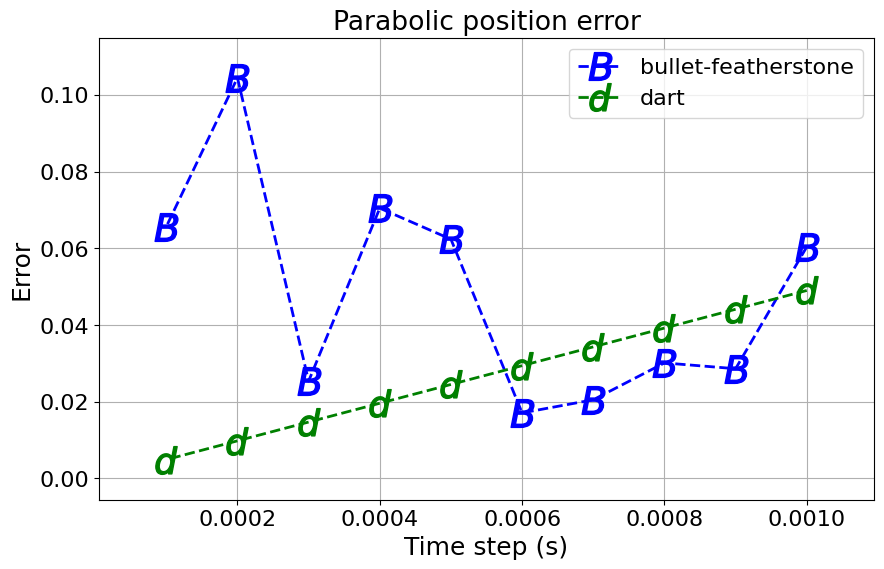

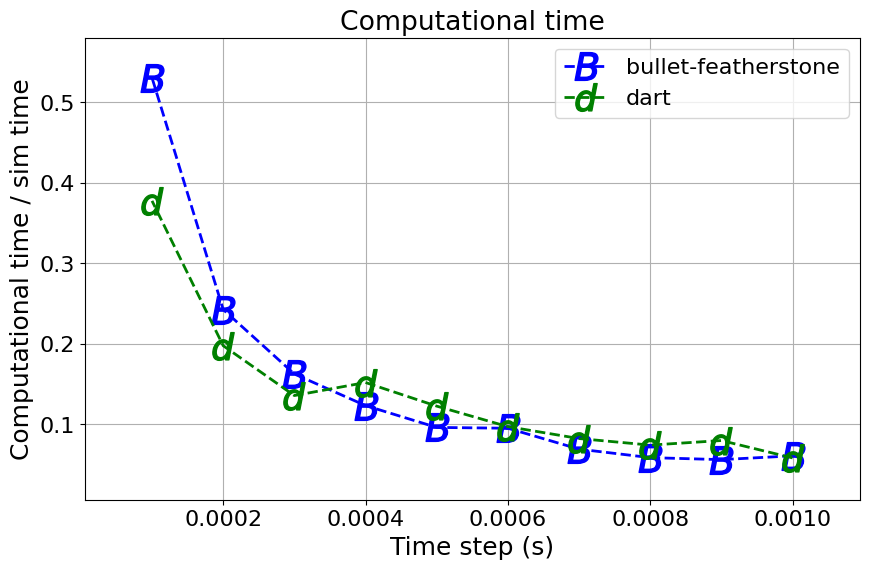

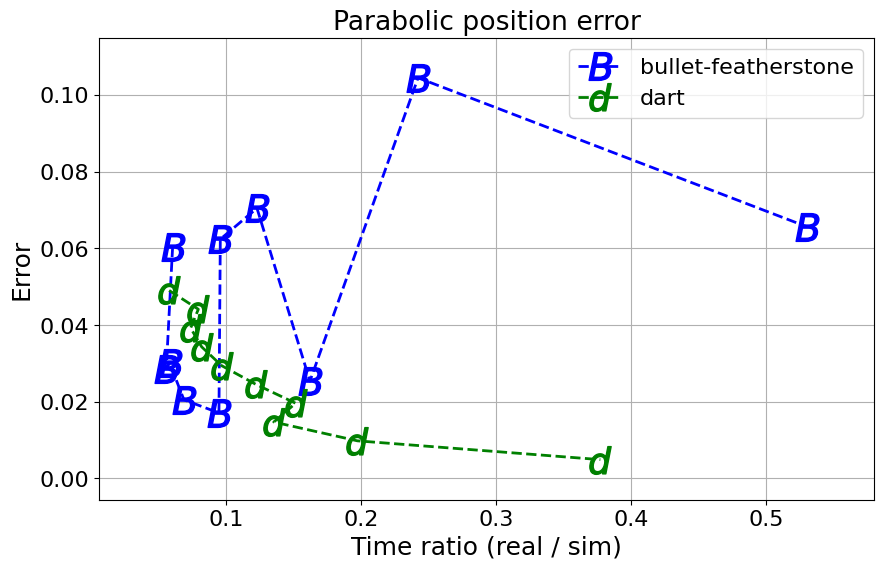

In [23]:
ph.plot3TimeDt({'classname': 'DtComplex'}
          , csvDict=boxes_dt
          , yname='linPositionErr_maxAbs'
          , title='Parabolic position error'
          )

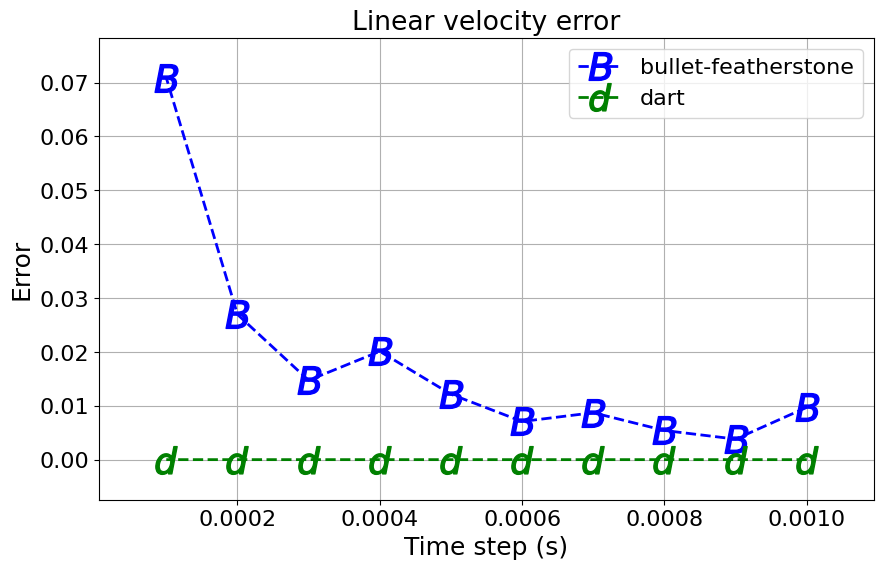

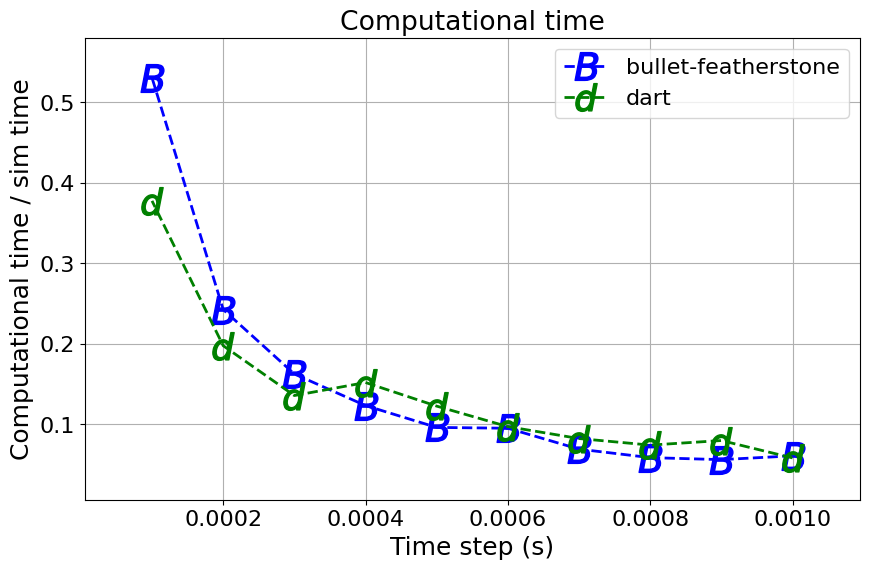

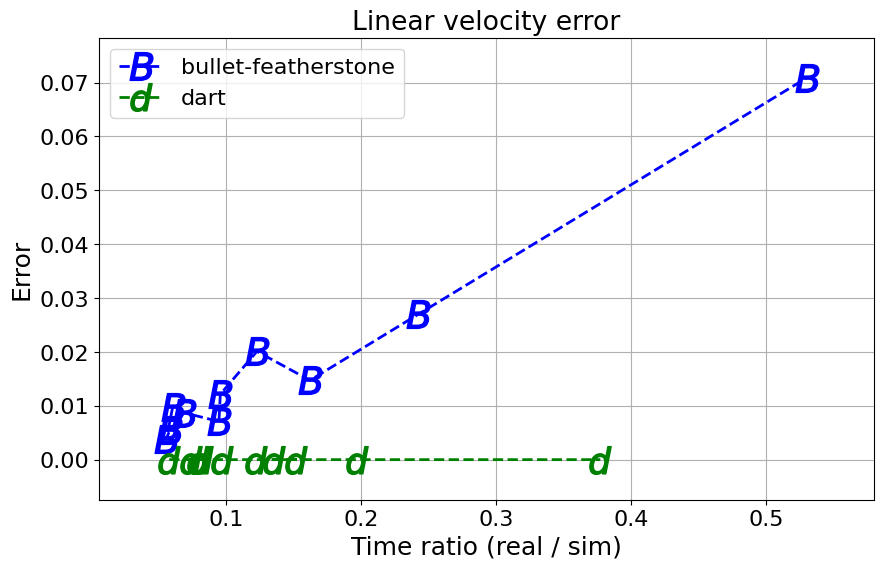

In [24]:
ph.plot3TimeDt({'classname': 'DtComplex'}
          , csvDict=boxes_dt
          , yname='linVelocityErr_maxAbs'
          , title='Linear velocity error'
          )

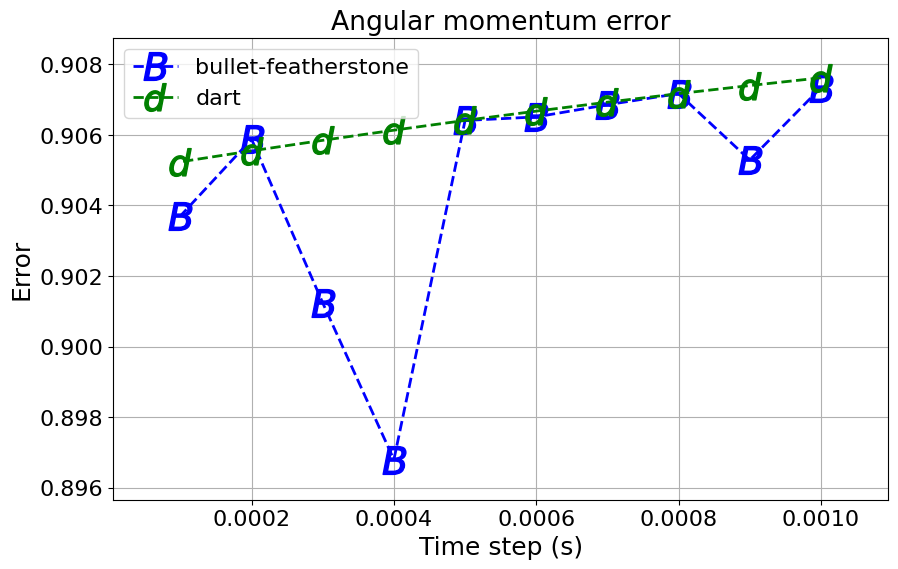

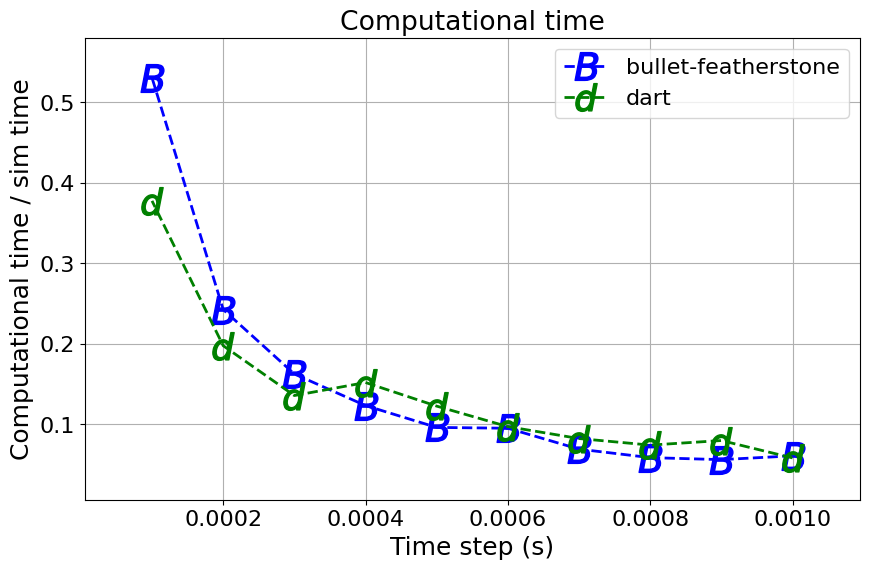

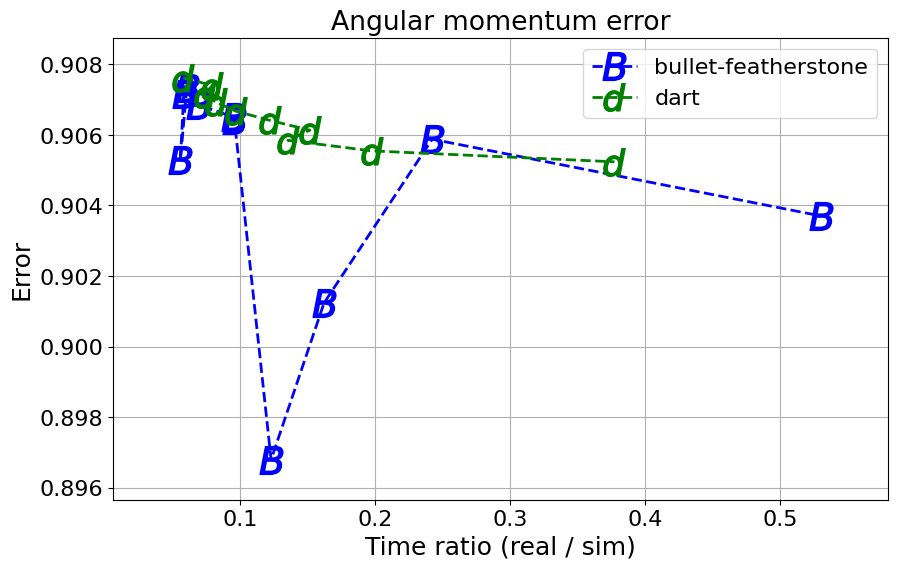

In [26]:
ph.plot3TimeDt({'classname': 'DtComplex'}
          , csvDict=boxes_dt
          , yname='angMomentumErr_maxAbs'
          , title='Angular momentum error'
          , skipDart=True
          )


### Test: multiple boxes, nonlinear trajectory

This test uses multiple rigid bodies spaced widely apart to identify the effect of on computational speed for each physics engine. Identical initial conditions are given to each box.

In [ ]:
boxes_model_count = csv_dictionary.makeCsvDictOfArrays('test_results/BENCHMARK_boxes_model_count.csv')
print(boxes_model_count.keys())
print(set(boxes_model_count['engine']))
print(set(boxes_model_count['linPositionErr_maxAbs']))
print(set(boxes_model_count['collision']))

csvDict = boxes_model_count
yname = 'timeRatio'
ylabel = 'Time ratio (real / sim)'
ylim = (-0.40000000000000036, 8.4000000000000004)

ph.plotEnginesModelCount({'classname': 'Boxes'}
                  , csvDict=csvDict
                  , yname=yname
                  , ylabel=ylabel
                  , title='Computational time with multiple boxes'
                )

ph.plotEnginesModelCount({'classname': 'Boxes', 'collision': 1.0}
                  , csvDict=csvDict
                  , yname=yname
                  , ylabel=ylabel
                  , title='Computational time with collision-checking'
                   )

ph.plotEnginesModelCount({'classname': 'Boxes', 'collision': 0.0}
                  , csvDict=csvDict
                  , yname=yname
                  , ylabel=ylabel
                  , ylim=ylim
                  , title='Computational time without collision-checking'
                   )